In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_data_dir ="C:/Users/81804/Desktop/data/train"
test_data_dir ="C:/Users/81804/Desktop/data/test"

train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(directory = train_data_dir,
                                                  target_size = (150,150),
                                                  batch_size = 32,
                                                  class_mode = "binary")
test_generator = test_datagen.flow_from_directory(directory = test_data_dir,
                                                  target_size = (150,150),
                                                  batch_size = 32,
                                                  class_mode = "binary")

Found 24998 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


In [6]:
print(train_generator.class_indices)

{'Cat': 0, 'Dog': 1}


In [9]:
import keras
from keras.models import  Sequential
from keras.layers import  Dense,Flatten
from keras.layers import  Conv2D,MaxPooling2D
from keras import  optimizers

model = Sequential()
model.add(Conv2D(64,kernel_size = (5,5),activation = "relu",input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128,kernel_size = (5,5),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128,kernel_size = (5,5),activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

sgd = optimizers.SGD(lr = 0.1)
model.compile(loss = "mean_squared_error",optimizer=sgd,metrics=["accuracy"])

history=model.fit_generator(train_generator,epochs = 2,verbose = 1,validation_data = (test_generator),
                           steps_per_epoch = 4000/32,validation_steps = 1000/32)

Epoch 1/2
125/125 [==============================] - 239s 2s/step - loss: 0.2494 - accuracy: 0.5268 - val_loss: 0.2486 - val_accuracy: 0.5137
Epoch 2/2
 67/125 [===============>..............] - ETA: 1:41 - loss: 0.2464 - accuracy: 0.5648

C:\Users\81804\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\81804\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\81804\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\81804\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\81804\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to r

125/125 [==============================] - 236s 2s/step - loss: 0.2454 - accuracy: 0.5650 - val_loss: 0.2391 - val_accuracy: 0.6045


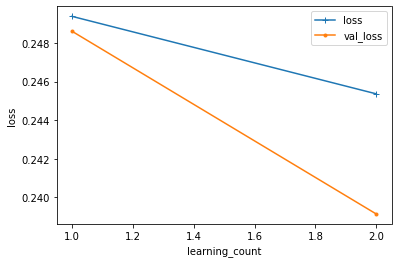

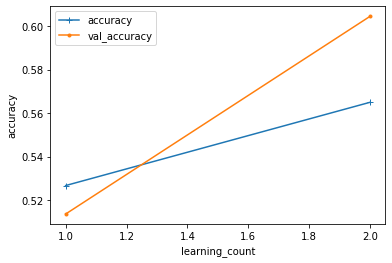

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

learning_count = len(loss)+1

plt.plot(range(1,learning_count),loss,marker = "+",label = "loss")
plt.plot(range(1,learning_count),val_loss,marker = ".",label = "val_loss")
plt.legend(loc = "best",fontsize = 10)
plt.xlabel("learning_count")
plt.ylabel("loss")
plt.show()

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

learning_count = len(loss)+1

plt.plot(range(1,learning_count),accuracy,marker = "+",label = "accuracy")
plt.plot(range(1,learning_count),val_accuracy,marker = ".",label = "val_accuracy")
plt.legend(loc = "best",fontsize = 10)
plt.xlabel("learning_count")
plt.ylabel("accuracy")
plt.show()

In [16]:
import numpy as np
from keras.preprocessing import image

TESTPATH = "test.jpg"

img = image.load_img(TESTPATH,target_size=(150,150))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=x/255.0

result_predict=model.predict(x)
print(result_predict)
#1は犬、０はネコの判断
#ネコの画像でテストしたが、学習回数が少ないため、犬よりの結果となった

[[0.6267886]]
